## Sample analysis
---
- To measure the company’s commitment to a seven-day delivery guarantee of test results to clients, I would use the date the client ships their sample and the date that the client receives their test results. By getting the difference in days between these two dates, we can see, in days, the total duration it takes the clients to receive their test results.

- How has performance changed over time?
    - The average delivery time in days has been consistent over the time interval of 6/9/22 - 12/23/22. It has taken ~ 4.5 - 4.7 days to deliver test results to clients over this interval.
    - For test results that took over 7 days to deliver, shipping issues were a prominent issue. 44% of test results taking over 7 days for delivery, had shipment issues documented in the notes.
    - The percentage of late samples has shown a slightly decreasing trend over the past 6 months.
    - No statistically significant difference in delivery time by office location. (Office I only had 1 sample recorded with a delivery time of 3 days)
<br> </br>
- What could be some factors that affect performance?
    1. Volume of samples received during week or month
    2. Shipping issues (takes longer interval of time to receive samples)
    3. Provider office/Provider office location
    4. Processing site



In [1]:
# Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import numpy as np

In [2]:
# Load dataset from csv file into a pandas dataframe
sample_df = pd.read_csv("sample_dataset.csv")
sample_df.head()

,test_id,age,gender,provider_office,provider_office_location,processing_lab_site,operator,sample_shipped_from_patient_on,sample_received_on,sample_processing_started_on,sample_processing_completed_on,test_results_reported_on,test_result,internal_notes
0,1,29,Female,Office A,NY,Lab C,C4,9/28/22,9/30/22,9/30/22,10/2/22,10/3/22,low-risk,none
1,2,41,Female,Office A,NY,Lab A,A3,10/11/22,10/13/22,10/13/22,10/15/22,10/15/22,low-risk,none
2,3,58,Male,Office B,IL,Lab A,A3,10/31/22,11/1/22,11/1/22,11/3/22,11/3/22,low-risk,none
3,4,40,Female,Office B,IL,Lab B,B2,11/3/22,11/4/22,11/5/22,11/7/22,11/7/22,low-risk,none
4,5,48,Male,Office B,IL,Lab C,C1,10/3/22,10/4/22,10/6/22,10/9/22,10/9/22,low-risk,none


## Data cleaning/exploration

In [3]:
# Check if data types are correct
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8993 entries, 0 to 8992
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   test_id                         8993 non-null   int64 
 1   age                             8993 non-null   int64 
 2   gender                          8993 non-null   object
 3   provider_office                 8993 non-null   object
 4   provider_office_location        8993 non-null   object
 5   processing_lab_site             8993 non-null   object
 6   operator                        8993 non-null   object
 7   sample_shipped_from_patient_on  8993 non-null   object
 8   sample_received_on              8993 non-null   object
 9   sample_processing_started_on    8993 non-null   object
 10  sample_processing_completed_on  8993 non-null   object
 11  test_results_reported_on        8993 non-null   object
 12  test_result                     8993 non-null   

In [4]:
# Correct following columns from strings to datetime
sample_df[["sample_shipped_from_patient_on", "sample_received_on", "sample_processing_started_on", "sample_processing_completed_on", "test_results_reported_on"]] = \
sample_df[["sample_shipped_from_patient_on", "sample_received_on", "sample_processing_started_on", "sample_processing_completed_on", "test_results_reported_on"]].apply(pd.to_datetime)

In [5]:
# Create a new columns delivery days that calculates, in days, the total duration it takes the clients to receive their test results.
sample_df["Delivery Time (Days)"] = sample_df["test_results_reported_on"] - sample_df["sample_shipped_from_patient_on"]
sample_df.head()

,test_id,age,gender,provider_office,provider_office_location,processing_lab_site,operator,sample_shipped_from_patient_on,sample_received_on,sample_processing_started_on,sample_processing_completed_on,test_results_reported_on,test_result,internal_notes,Delivery Time (Days)
0,1,29,Female,Office A,NY,Lab C,C4,2022-09-28,2022-09-30,2022-09-30,2022-10-02,2022-10-03,low-risk,none,5 days
1,2,41,Female,Office A,NY,Lab A,A3,2022-10-11,2022-10-13,2022-10-13,2022-10-15,2022-10-15,low-risk,none,4 days
2,3,58,Male,Office B,IL,Lab A,A3,2022-10-31,2022-11-01,2022-11-01,2022-11-03,2022-11-03,low-risk,none,3 days
3,4,40,Female,Office B,IL,Lab B,B2,2022-11-03,2022-11-04,2022-11-05,2022-11-07,2022-11-07,low-risk,none,4 days
4,5,48,Male,Office B,IL,Lab C,C1,2022-10-03,2022-10-04,2022-10-06,2022-10-09,2022-10-09,low-risk,none,6 days


In [6]:
# Ensuring that the datatypes are all correct now
sample_df.dtypes

test_id                                     int64
age                                         int64
gender                                     object
provider_office                            object
provider_office_location                   object
processing_lab_site                        object
operator                                   object
sample_shipped_from_patient_on     datetime64[ns]
sample_received_on                 datetime64[ns]
sample_processing_started_on       datetime64[ns]
sample_processing_completed_on     datetime64[ns]
test_results_reported_on           datetime64[ns]
test_result                                object
internal_notes                             object
Delivery Time (Days)              timedelta64[ns]
dtype: object

In [7]:
# Seeing some unsual values. Should not be seeing negative numbers for days the sample results take to deliver.
sample_df["Delivery Time (Days)"].value_counts()

4 days       3198
5 days       2481
3 days       1461
6 days       1088
7 days        448
8 days        222
9 days         68
10 days        23
-28 days        1
-360 days       1
35 days         1
11 days         1
Name: Delivery Time (Days), dtype: int64

In other scenarios would need further clarity on below data, for this analysis I will assume these are errors in data entry of sample shipping date and should be corrected

In [8]:
# These following test results could be potential outliers or have errors in data entry
sample_df.loc[(sample_df["Delivery Time (Days)"].dt.days < 0) | (sample_df["Delivery Time (Days)"].dt.days > 11)]

,test_id,age,gender,provider_office,provider_office_location,processing_lab_site,operator,sample_shipped_from_patient_on,sample_received_on,sample_processing_started_on,sample_processing_completed_on,test_results_reported_on,test_result,internal_notes,Delivery Time (Days)
348,349,53,Male,Office C,CA,Lab B,B3,2022-09-11,2022-08-12,2022-08-12,2022-08-14,2022-08-14,low-risk,none,-28 days
706,707,50,Female,Office C,CA,Lab C,C1,2023-06-28,2022-06-29,2022-06-30,2022-07-03,2022-07-03,low-risk,none,-360 days
938,939,46,Male,Office A,NY,Lab C,C4,2022-06-11,2022-07-13,2022-07-14,2022-07-16,2022-07-16,low-risk,none,35 days


In [9]:
sample_df.iloc[348, 7] = pd.to_datetime("2022-08-11")
sample_df.iloc[348,:]

test_id                                           349
age                                                53
gender                                           Male
provider_office                              Office C
provider_office_location                           CA
processing_lab_site                             Lab B
operator                                           B3
sample_shipped_from_patient_on    2022-08-11 00:00:00
sample_received_on                2022-08-12 00:00:00
sample_processing_started_on      2022-08-12 00:00:00
sample_processing_completed_on    2022-08-14 00:00:00
test_results_reported_on          2022-08-14 00:00:00
test_result                                  low-risk
internal_notes                                   none
Delivery Time (Days)               -28 days +00:00:00
Name: 348, dtype: object

In [10]:
sample_df.iloc[706, 7] = pd.to_datetime("2022-06-28")
sample_df.iloc[706,:]

test_id                                           707
age                                                50
gender                                         Female
provider_office                              Office C
provider_office_location                           CA
processing_lab_site                             Lab C
operator                                           C1
sample_shipped_from_patient_on    2022-06-28 00:00:00
sample_received_on                2022-06-29 00:00:00
sample_processing_started_on      2022-06-30 00:00:00
sample_processing_completed_on    2022-07-03 00:00:00
test_results_reported_on          2022-07-03 00:00:00
test_result                                  low-risk
internal_notes                                   none
Delivery Time (Days)              -360 days +00:00:00
Name: 706, dtype: object

In [11]:
sample_df.iloc[938, 7] = pd.to_datetime("2022-07-11")
sample_df.iloc[938,:]

test_id                                           939
age                                                46
gender                                           Male
provider_office                              Office A
provider_office_location                           NY
processing_lab_site                             Lab C
operator                                           C4
sample_shipped_from_patient_on    2022-07-11 00:00:00
sample_received_on                2022-07-13 00:00:00
sample_processing_started_on      2022-07-14 00:00:00
sample_processing_completed_on    2022-07-16 00:00:00
test_results_reported_on          2022-07-16 00:00:00
test_result                                  low-risk
internal_notes                                   none
Delivery Time (Days)                 35 days 00:00:00
Name: 938, dtype: object

In [12]:
# Now that data has been updated, drop column and add updated column to calculate delivery time
sample_df.drop(columns="Delivery Time (Days)")
sample_df["Delivery Time (Days)"] = sample_df["test_results_reported_on"] - sample_df["sample_shipped_from_patient_on"]

# Creating a new column for month sample was shipped
sample_df["shipping month"] = sample_df["sample_shipped_from_patient_on"].dt.month
sample_df.head()

,test_id,age,gender,provider_office,provider_office_location,processing_lab_site,operator,sample_shipped_from_patient_on,sample_received_on,sample_processing_started_on,sample_processing_completed_on,test_results_reported_on,test_result,internal_notes,Delivery Time (Days),shipping month
0,1,29,Female,Office A,NY,Lab C,C4,2022-09-28,2022-09-30,2022-09-30,2022-10-02,2022-10-03,low-risk,none,5 days,9
1,2,41,Female,Office A,NY,Lab A,A3,2022-10-11,2022-10-13,2022-10-13,2022-10-15,2022-10-15,low-risk,none,4 days,10
2,3,58,Male,Office B,IL,Lab A,A3,2022-10-31,2022-11-01,2022-11-01,2022-11-03,2022-11-03,low-risk,none,3 days,10
3,4,40,Female,Office B,IL,Lab B,B2,2022-11-03,2022-11-04,2022-11-05,2022-11-07,2022-11-07,low-risk,none,4 days,11
4,5,48,Male,Office B,IL,Lab C,C1,2022-10-03,2022-10-04,2022-10-06,2022-10-09,2022-10-09,low-risk,none,6 days,10


In [13]:
# Values have been updated
sample_df["Delivery Time (Days)"].value_counts()

4 days     3198
5 days     2483
3 days     1462
6 days     1088
7 days      448
8 days      222
9 days       68
10 days      23
11 days       1
Name: Delivery Time (Days), dtype: int64

In [14]:
# We're receiving a higher volume of samples as the months go on
sample_df["shipping month"].value_counts()

12    2554
10    1798
11    1649
9     1217
8      747
7      646
6      382
Name: shipping month, dtype: int64

#### Overall the data shows a consistent trend in average delivery days per month (4.5 - 4.8 days)

In [15]:
# Find the average sample results delivery time (in days) by month
sample_df["Delivery Time (Days)"] = sample_df["Delivery Time (Days)"].dt.days

month_df = sample_df.groupby("shipping month")["Delivery Time (Days)"].mean()
month_df

shipping month
6     4.777487
7     4.678019
8     4.585007
9     4.646672
10    4.661846
11    4.684051
12    4.640955
Name: Delivery Time (Days), dtype: float64

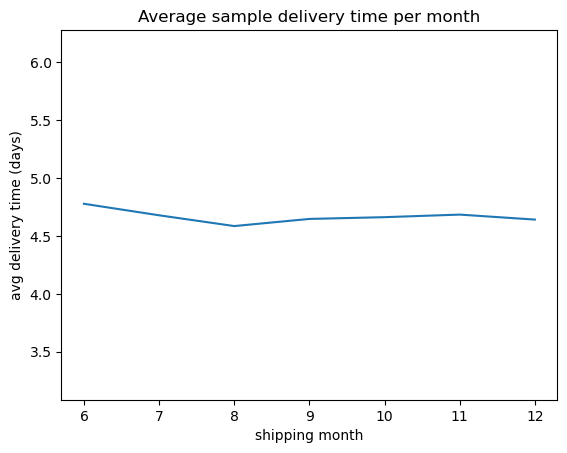

In [16]:
month_df.plot(kind="line")

plt.title("Average sample delivery time per month")
plt.xlabel("shipping month")
plt.ylabel("avg delivery time (days)")
plt.ylim(min(month_df.values) - 1.5, max(month_df.values) + 1.5)

plt.show()

In [17]:
# Finding the samples that did not meet the 7 day delivery guarantee
results_df = sample_df.loc[sample_df["Delivery Time (Days)"] > 7,:]
results_df.head()

,test_id,age,gender,provider_office,provider_office_location,processing_lab_site,operator,sample_shipped_from_patient_on,sample_received_on,sample_processing_started_on,sample_processing_completed_on,test_results_reported_on,test_result,internal_notes,Delivery Time (Days),shipping month
13,14,44,Male,Office C,CA,Lab B,B4,2022-11-09,2022-11-11,2022-11-11,2022-11-17,2022-11-17,low-risk,requisition_form_issue,8,11
14,15,40,Female,Office B,IL,Lab A,A2,2022-11-28,2022-12-02,2022-12-03,2022-12-06,2022-12-06,low-risk,shipment_issue,8,11
39,40,50,Female,Office C,CA,Lab C,C3,2022-08-30,2022-08-31,2022-09-01,2022-09-07,2022-09-07,low-risk,shipment_issue,8,8
82,83,42,Male,Office A,NY,Lab C,C2,2022-07-06,2022-07-11,2022-07-12,2022-07-14,2022-07-14,low-risk,none,8,7
86,87,62,Male,Office B,IL,Lab A,A1,2022-12-12,2022-12-16,2022-12-18,2022-12-20,2022-12-20,low-risk,requisition_form_issue,8,12


In [18]:
# Seems like majority of the samples that did not meet the 7 day delivery of results guarantee ran into some kind of shipment issues.
incident_df = results_df.groupby("internal_notes")["internal_notes"].count().sort_values(ascending=False)
incident_df

internal_notes
shipment_issue            139
requisition_form_issue     55
none                       53
processing_issue           48
other                      17
sample_volume_issue         2
Name: internal_notes, dtype: int64

In [19]:
# Comparing to the notes for all samples, majority of samples did not have an incident.
sample_df.groupby("internal_notes")["internal_notes"].count().sort_values(ascending=False)

internal_notes
none                      6633
shipment_issue             933
requisition_form_issue     678
processing_issue           489
other                      170
sample_volume_issue         90
Name: internal_notes, dtype: int64

#### The following chart depicts the incident counts by category for samples that did not meet the 7 day return guarantee

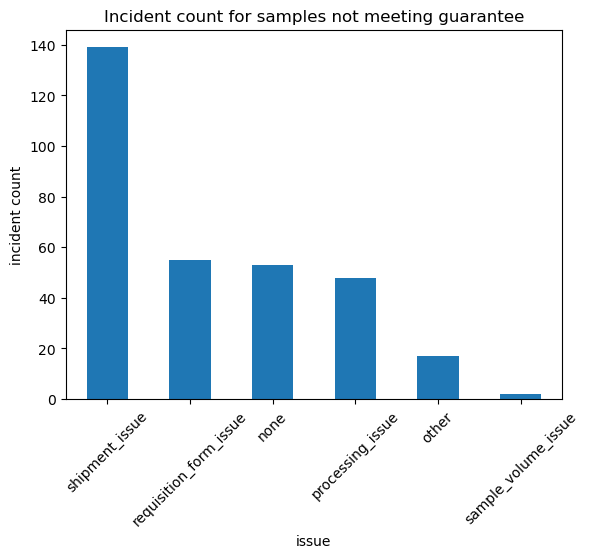

In [20]:
incident_df.plot(kind="bar", rot=45)

plt.title("Incident count for samples not meeting guarantee")
plt.xlabel("issue")
plt.ylabel("incident count")
plt.show()

In [21]:
results_df["shipping month"].value_counts()

12    73
10    63
11    61
9     46
8     29
7     23
6     19
Name: shipping month, dtype: int64

In [22]:
sample_per_month_df = pd.DataFrame({"Samples by month": sample_df["shipping month"].value_counts(),
              "Overdue samples by month": results_df["shipping month"].value_counts()})

sample_per_month_df

,Samples by month,Overdue samples by month
12,2554,73
10,1798,63
11,1649,61
9,1217,46
8,747,29
7,646,23
6,382,19


In [23]:
sample_per_month_df["late_sample_pct"] = (sample_per_month_df["Overdue samples by month"] / sample_per_month_df["Samples by month"]) * 100
sample_per_month_df.sort_index()

,Samples by month,Overdue samples by month,late_sample_pct
6,382,19,4.973822
7,646,23,3.560372
8,747,29,3.882195
9,1217,46,3.779786
10,1798,63,3.503893
11,1649,61,3.699212
12,2554,73,2.858262


#### We received the most samples in the month of december. December has the lowest percentage of overdue samples (> 7 day delivery period)

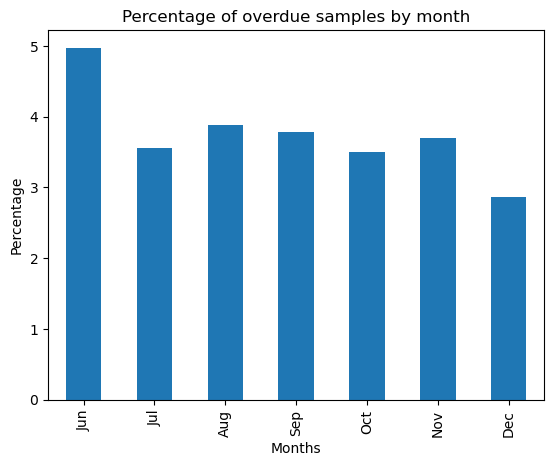

In [24]:
months = sample_per_month_df["late_sample_pct"].sort_index()

y_axis = np.arange(len(sample_per_month_df))
tick_locations = [value for value in y_axis]
x_axis = ["Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

months.plot(kind="bar")


plt.title("Percentage of overdue samples by month")
plt.xlabel("Months")
plt.ylabel("Percentage")
plt.xticks(tick_locations, x_axis)
plt.show()

In [25]:
office_df = results_df.groupby(["provider_office", "provider_office_location"]).mean()
office_df["Delivery Time (Days)"].sort_values(ascending=False)

C:\Users\ajain\AppData\Local\Temp\ipykernel_2352\2444637923.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  office_df = results_df.groupby(["provider_office", "provider_office_location"]).mean()


provider_office  provider_office_location
Office H         NC                          8.666667
Office B         IL                          8.629630
Office G         MO                          8.450000
Office E         CO                          8.448276
Office C         CA                          8.328859
Office A         NY                          8.314286
Office D         NY                          8.266667
Name: Delivery Time (Days), dtype: float64

In [26]:
# Check sample delivery time by office location and office
office_mean = sample_df.groupby(["provider_office", "provider_office_location"])["Delivery Time (Days)"].mean()
office_count = sample_df.groupby(["provider_office", "provider_office_location"])["Delivery Time (Days)"].count()

pd.DataFrame({ "count of samples": office_count, "avg delivery time (days)": round(office_mean, 2)})

,,count of samples,avg delivery time (days)
provider_office,provider_office_location,,
Office A,NY,922,4.67
Office B,IL,683,4.71
Office C,CA,4478,4.65
Office D,NY,1542,4.62
Office E,CO,734,4.71
Office F,WA,89,4.49
Office G,MO,408,4.66
Office H,NC,136,4.87
Office I,NY,1,3.00


##### Doesn't seem to be much of a difference for delivery based on office location. Office I has only processed 1 sample with a return time of only 3 days. Is there something special about this office and can it be used to test more samples?

In [27]:
sample_df.loc[sample_df["provider_office"] == "Office I"]

,test_id,age,gender,provider_office,provider_office_location,processing_lab_site,operator,sample_shipped_from_patient_on,sample_received_on,sample_processing_started_on,sample_processing_completed_on,test_results_reported_on,test_result,internal_notes,Delivery Time (Days),shipping month
4675,4676,36,Male,Office I,NY,Lab C,C4,2022-11-02,2022-11-03,2022-11-03,2022-11-05,2022-11-05,low-risk,none,3,11


In [30]:
# Export clean sample dataset 
sample_df.to_csv("../Output/sample_clean.csv", index=False)